In [37]:
#Importing Libraries 
#basics and Visualization
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#ML librarie
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs
from sklearn.model_selection import cross_val_score


In [18]:
df = pd.read_csv(r'flare.data2', sep=' ', header=None)

In [28]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5,0,3,1,3,1,1,1,1,1,0,0,0
1,2,3,2,1,3,1,1,2,1,1,0,0,0
2,1,4,2,1,3,1,1,2,1,1,0,0,0
3,5,3,3,1,2,1,1,1,1,1,0,0,0
4,5,4,3,1,1,1,1,2,1,1,0,0,0
5,1,0,2,1,2,1,1,2,1,1,0,0,0
6,0,5,2,1,3,1,1,2,1,1,0,0,0
7,1,0,2,1,3,1,1,2,1,1,0,0,0
8,1,0,2,1,2,1,1,2,1,1,1,0,0
9,0,5,2,1,3,1,1,2,1,1,0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1066 non-null   int64
 1   1       1066 non-null   int64
 2   2       1066 non-null   int64
 3   3       1066 non-null   int64
 4   4       1066 non-null   int64
 5   5       1066 non-null   int64
 6   6       1066 non-null   int64
 7   7       1066 non-null   int64
 8   8       1066 non-null   int64
 9   9       1066 non-null   int64
 10  10      1066 non-null   int64
 11  11      1066 non-null   int64
 12  12      1066 non-null   int64
dtypes: int64(13)
memory usage: 108.4 KB


In [21]:
df[0] = LabelEncoder().fit_transform(df[0].tolist())
df[1] = LabelEncoder().fit_transform(df[1].tolist())
df[2] = LabelEncoder().fit_transform(df[2].tolist())

<AxesSubplot:>

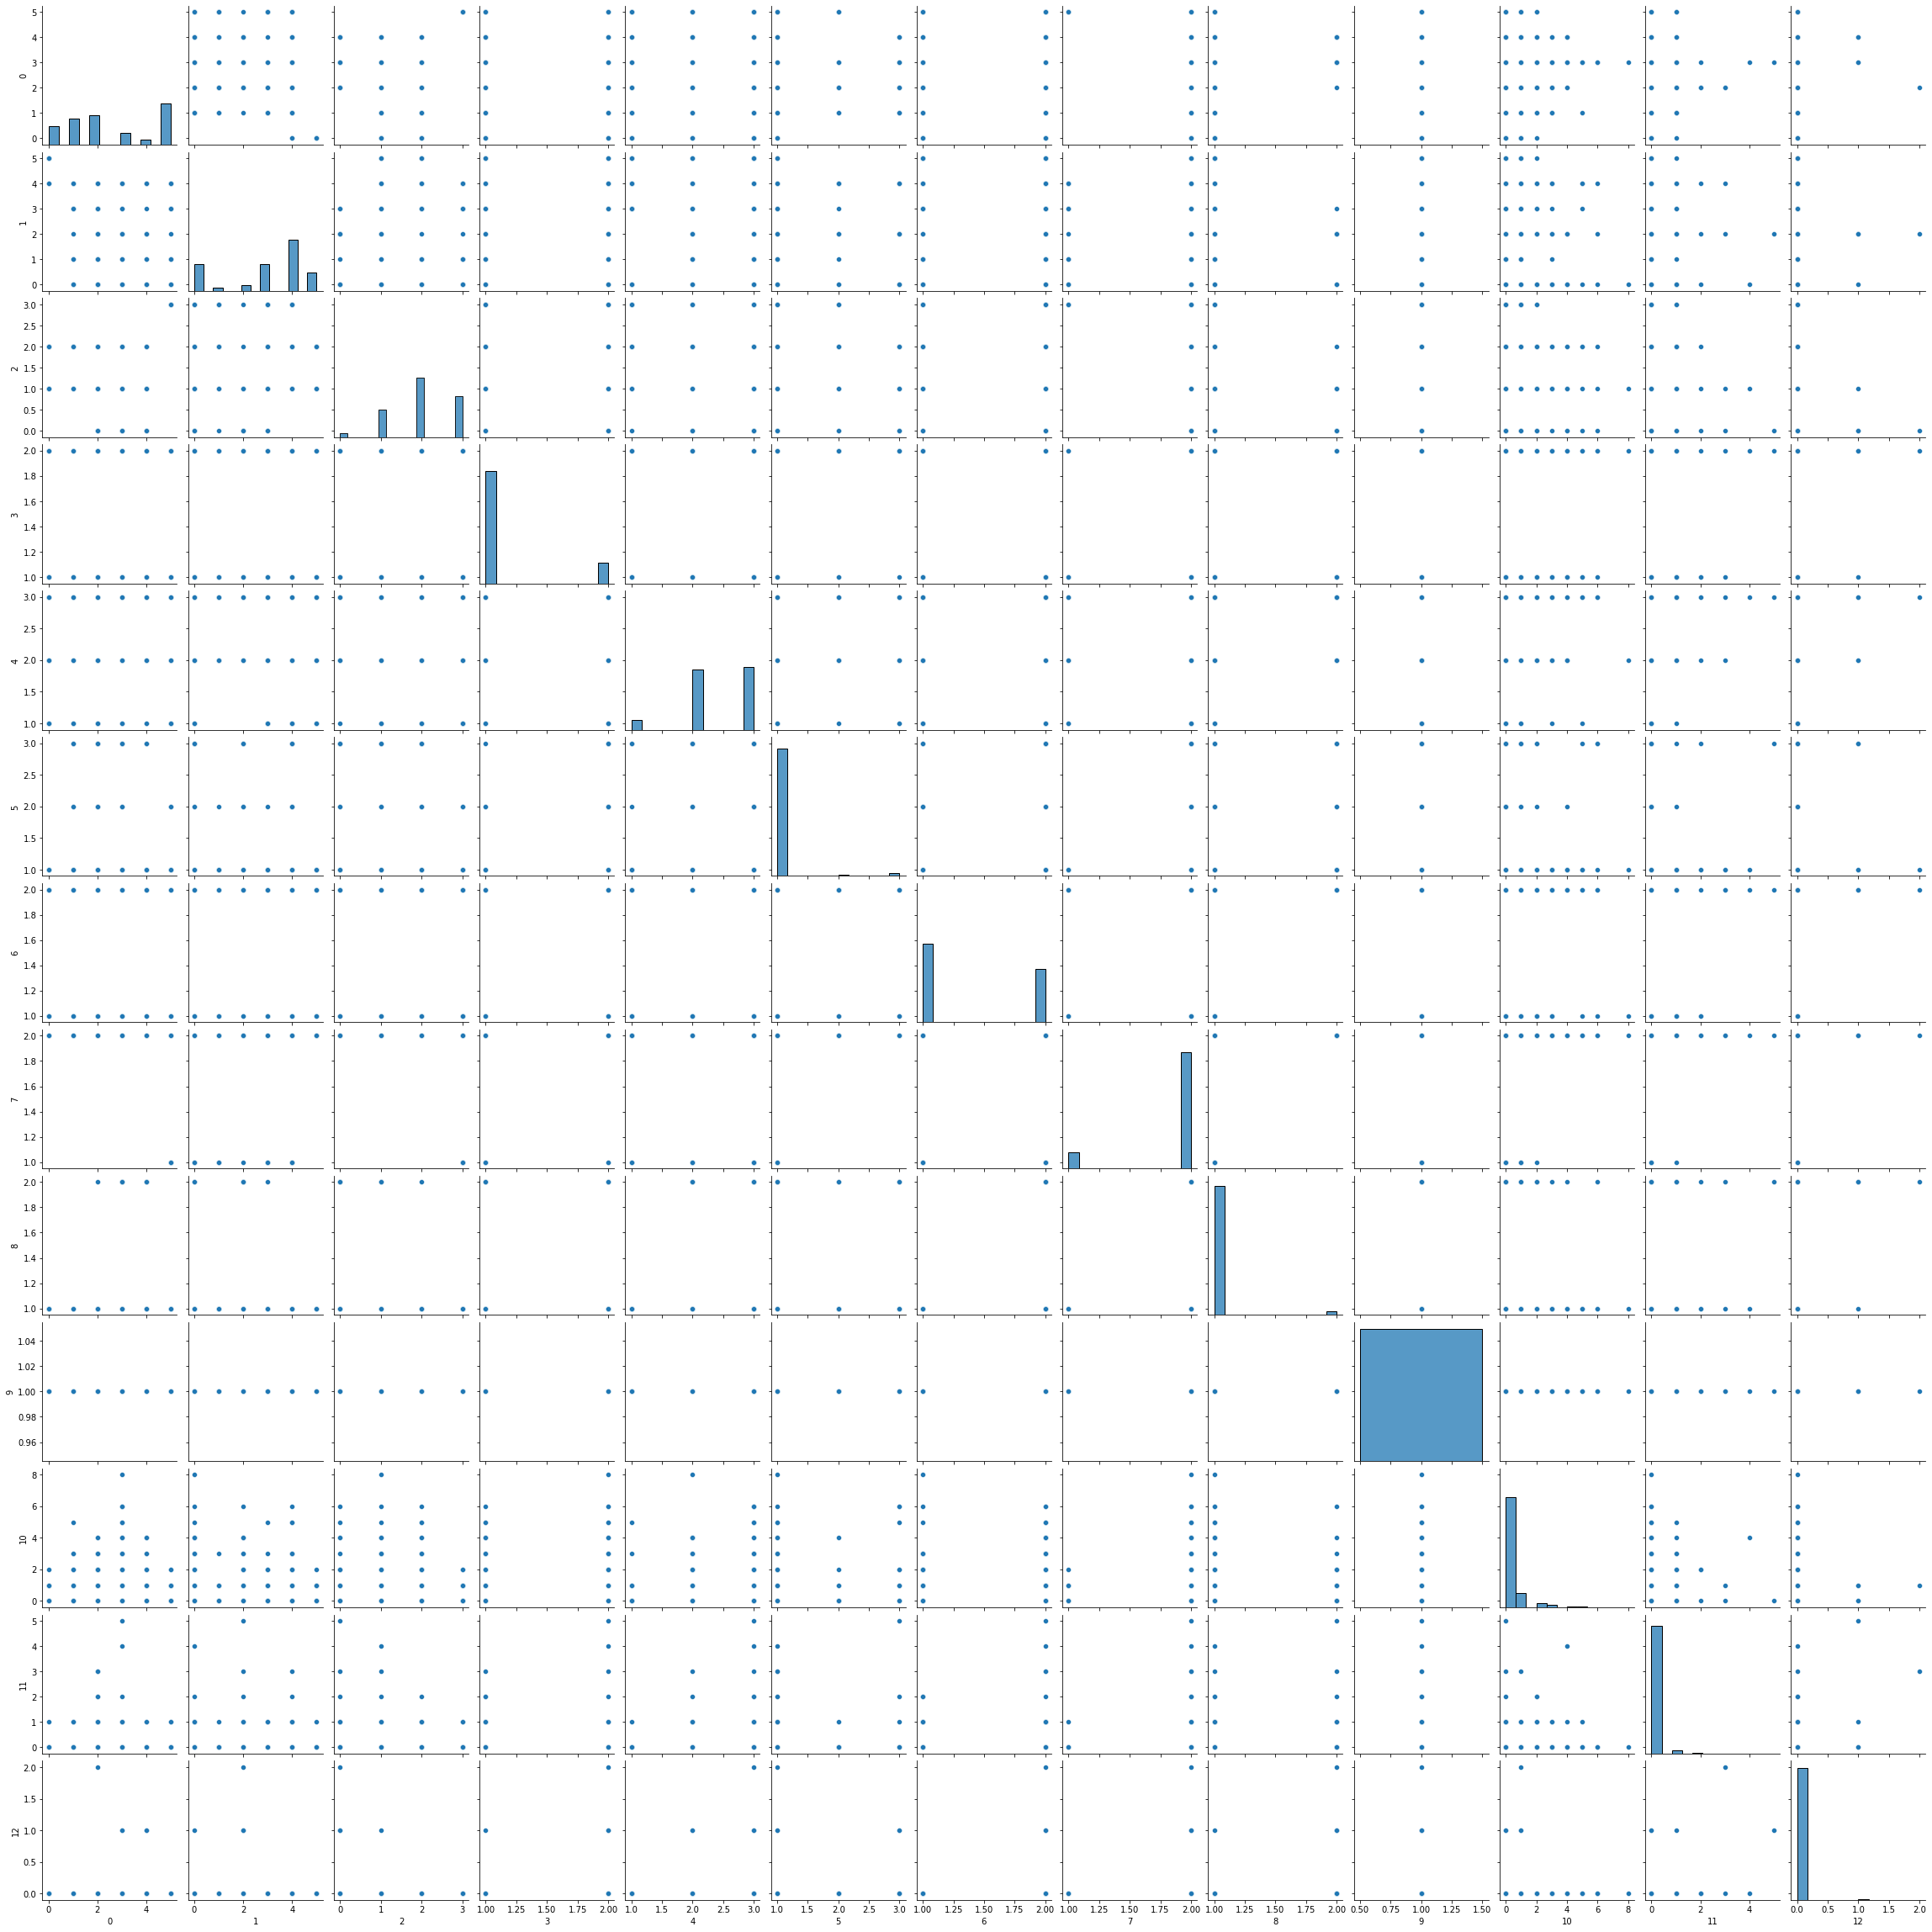

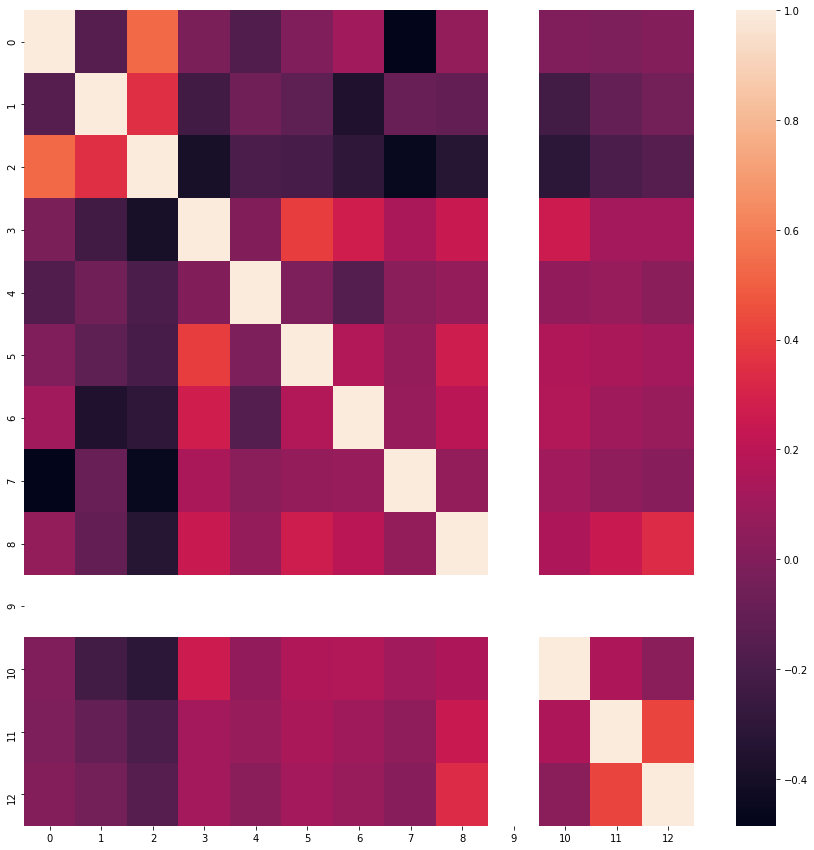

In [24]:
sns.pairplot(data=df)

#Heatmap
num_feat = df.select_dtypes(include=np.number).columns
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr())

In [ ]:
# TODO
# with sns.plotting_context("notebook",font_scale=2.5):
#     g = sns.pairplot(house[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
#                  hue='bedrooms', palette='tab20',size=6)
# g.set(xticklabels=[]);

In [27]:
set(df[9])

{1}

Drop 9th attribute

In [30]:
y1 = df[10]
y2 = df[11]
y3 = df[12]
X = df.drop([9, 10, 11, 12], axis = 1)
X.head()

,0,1,2,3,4,5,6,7,8
0,5,0,3,1,3,1,1,1,1
1,2,3,2,1,3,1,1,2,1
2,1,4,2,1,3,1,1,2,1
3,5,3,3,1,2,1,1,1,1
4,5,4,3,1,1,1,1,2,1


In [ ]:
# TODO
# B. Normality and skewness
# Rescaling?
# TODO
# finaldata = pd.get_dummies(data) for 0,1,2

In [33]:
# TODO other y`s
train_X, test_X, train_y, test_y = train_test_split(X, y1, test_size = 20)

In [34]:
LR = LinearRegression(normalize=True)
LR.fit(train_X, train_y)

LinearRegression(normalize=True)

In [35]:
maxcoef = np.argsort(-np.abs(LR.coef_))
coef = LR.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df.columns[maxcoef[i]], coef[i]))


2........................ -3.2131e-01
3........................  2.7173e-01
5........................  1.2489e-01
8........................ -9.6099e-02
0........................  7.4270e-02


In [40]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y))

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets